<a href="https://colab.research.google.com/github/hvr2026/Apache-Beam-Data-Engineering/blob/main/EDA/Netflix_EDA_And_D3Js.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Comprehensive workflow for Exploratory Data Analysis (EDA), clustering, dimensionality reduction, and the creation of interactive visualizations using D3.js on the Netflix Movies and TV Shows dataset from Kaggle. This dataset contains metadata about movies and TV shows, including attributes like release year, type (movie or TV show), duration, rating, and more.

1. Dataset Preparation and Library Installation
I began by setting up the necessary Python libraries, including Pandas, Seaborn, Matplotlib, and Scikit-learn. The dataset was loaded into a Pandas DataFrame, and the initial rows were displayed to understand its structure. Google Colab's files module was used to upload the CSV file into the notebook environment.

2. Exploratory Data Analysis (EDA)
The EDA process provided a detailed exploration of the dataset:

Missing values in each column were identified and reported.
Visualizations were created to understand key patterns, such as the distribution of release years and the proportions of movies versus TV shows.
The correlation between numerical variables was visualized using a heatmap. This helped in understanding relationships between features and informed the subsequent clustering and dimensionality reduction processes.
3. Data Cleaning
To prepare the dataset for clustering:

Missing values were handled appropriately, with placeholders for ratings and numerical imputation for the duration column.
The duration column was cleaned to extract numerical values, differentiating between movies (in minutes) and TV shows (seasons).
Non-essential columns, such as title and description, were dropped to reduce noise.
Categorical variables like type and rating were converted into numerical format using one-hot encoding.
4. Clustering with K-Means
Clustering was performed to group the data into meaningful clusters:

Features such as release_year and duration were standardized using StandardScaler.
The Elbow Method was used to determine the optimal number of clusters by plotting the Within-Cluster Sum of Squares (WSS) for various values of k.
K-Means Clustering was applied with three clusters, and the results were visualized using a scatterplot. This provided insights into how movies and TV shows were grouped based on their release year and duration.
5. Dimensionality Reduction using PCA
To simplify the data while retaining significant information:

Principal Component Analysis (PCA) was applied to reduce the dataset to two components.
The results of the PCA were visualized in a 2D scatterplot, showing how the clusters could be represented in reduced dimensions.
The explained variance by each component was calculated and reported, ensuring that the two principal components captured most of the dataset's variability.
6. Interactive Visualization with D3.js
An interactive scatterplot was created using D3.js, embedded within the Jupyter Notebook using HTML and JavaScript. The scatterplot visualized PCA results with color-coded clusters. The data was dynamically passed to the D3.js script, which utilized SVG for rendering. Axes, scales, and tooltips were implemented to enhance interactivity and usability.

In [1]:

# Install necessary libraries
!pip install pandas matplotlib seaborn scikit-learn

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Upload the Netflix dataset
from google.colab import files
uploaded = files.upload()

# Load the dataset into a Pandas DataFrame
data = pd.read_csv("netflix_titles.csv")

# Display the first few rows of the dataset
data.head()


Saving netflix_titles.csv to netflix_titles.csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Missing values per column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


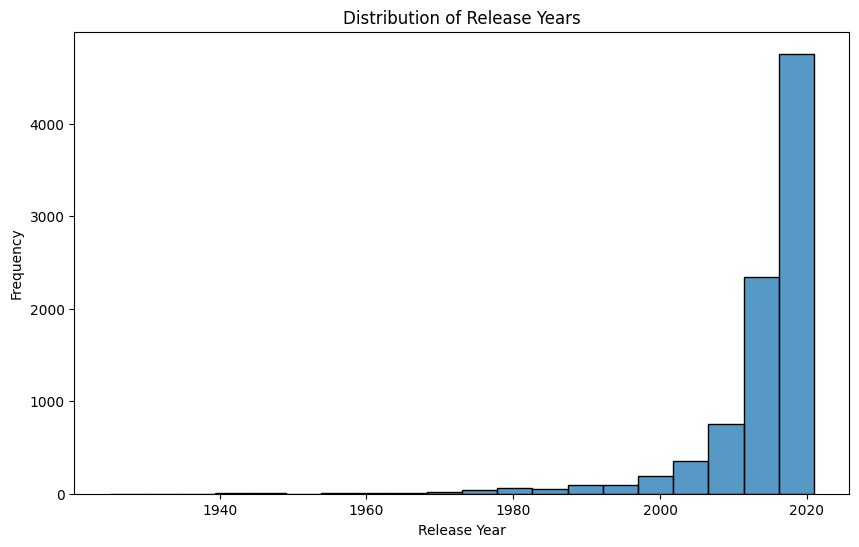

<ipython-input-2-593fd835428b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data=data, palette="Set2")


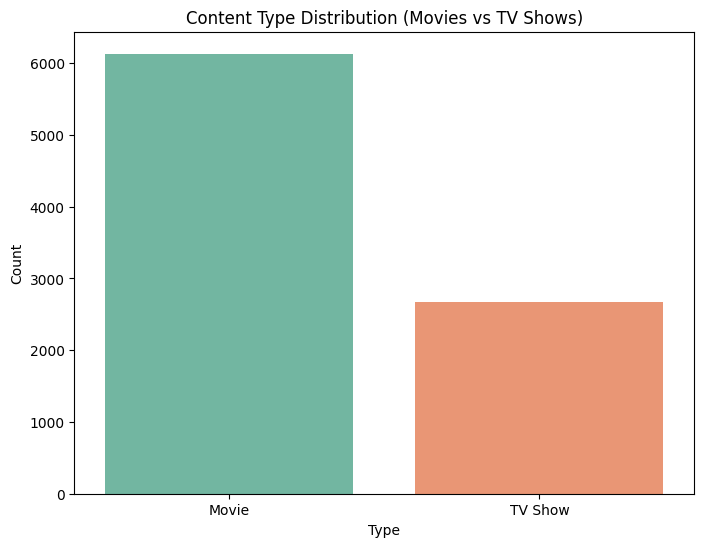

In [2]:

# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Visualize the distribution of release years
plt.figure(figsize=(10, 6))
sns.histplot(data['release_year'], bins=20, kde=False)
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.show()

# Visualize the count of content types (Movies vs TV Shows)
plt.figure(figsize=(8, 6))
sns.countplot(x="type", data=data, palette="Set2")
plt.title("Content Type Distribution (Movies vs TV Shows)")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


In [3]:

# Fill missing values in 'rating' with a placeholder
data['rating'].fillna('Unknown', inplace=True)

# Fill missing values in 'duration' with 0
data['duration'].fillna('0', inplace=True)

# Convert duration for Movies (in minutes) to numeric values
def extract_duration(row):
    if 'min' in row:
        return int(row.split()[0])
    elif 'Season' in row:
        return 0  # TV Shows
    else:
        return 0  # Placeholder for unknown

data['duration'] = data['duration'].apply(extract_duration)

# Drop irrelevant columns
data_cleaned = data.drop(columns=['show_id', 'title', 'description', 'director', 'cast', 'country', 'date_added'])

# Convert categorical columns to numerical using one-hot encoding
categorical_cols = ['type', 'rating']
data_cleaned = pd.get_dummies(data_cleaned, columns=categorical_cols, drop_first=True)

data_cleaned.head()


<ipython-input-3-4197f756f536>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rating'].fillna('Unknown', inplace=True)
<ipython-input-3-4197f756f536>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

,release_year,duration,listed_in,type_TV Show,rating_74 min,rating_84 min,rating_G,rating_NC-17,rating_NR,rating_PG,...,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,rating_Unknown
0,2020,90,Documentaries,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2021,0,"International TV Shows, TV Dramas, TV Mysteries",True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2021,0,"Crime TV Shows, International TV Shows, TV Act...",True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,2021,0,"Docuseries, Reality TV",True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,2021,0,"International TV Shows, Romantic TV Shows, TV ...",True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


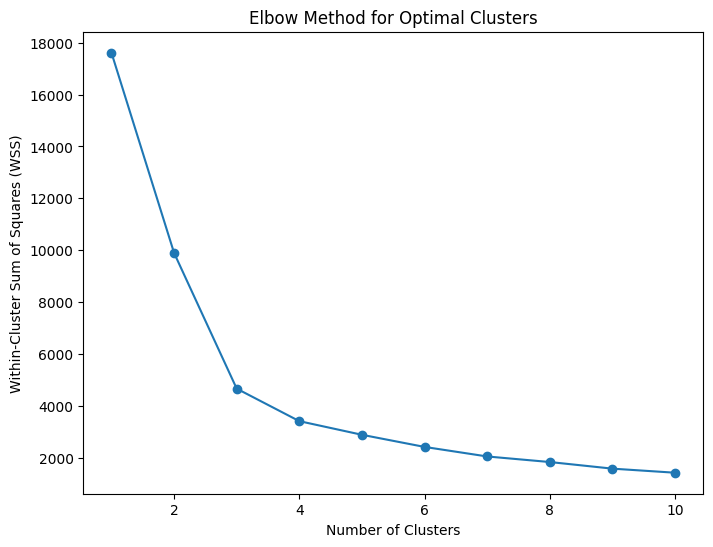

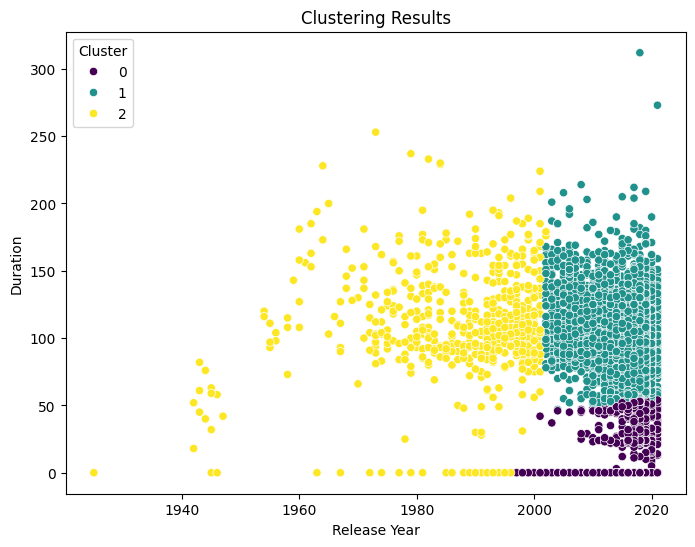

In [4]:

# Select features for clustering
features = ['release_year', 'duration']
X = data_cleaned[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
wss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares (WSS)")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

# Perform KMeans clustering with the optimal number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data_cleaned['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned['release_year'], y=data_cleaned['duration'], hue=data_cleaned['Cluster'], palette='viridis')
plt.title("Clustering Results")
plt.xlabel("Release Year")
plt.ylabel("Duration")
plt.show()


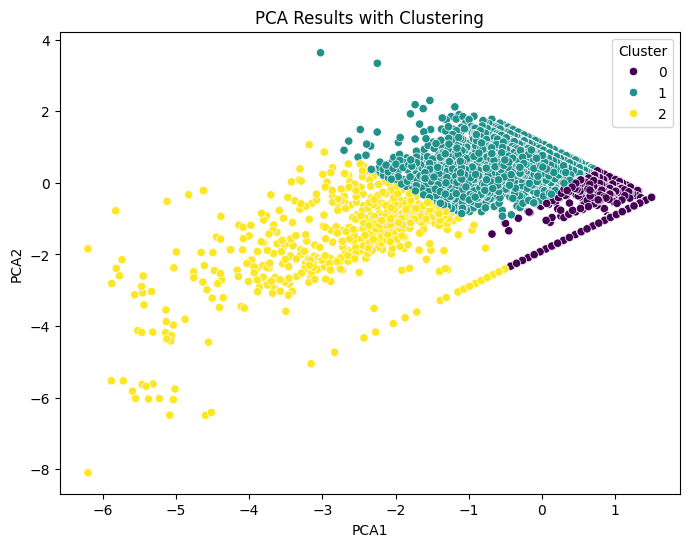


Explained variance by each component:
[0.6239796 0.3760204]


In [5]:

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results to the DataFrame
data_cleaned['PCA1'] = X_pca[:, 0]
data_cleaned['PCA2'] = X_pca[:, 1]

# Visualize PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned['PCA1'], y=data_cleaned['PCA2'], hue=data_cleaned['Cluster'], palette='viridis')
plt.title("PCA Results with Clustering")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

# Print explained variance by PCA components
explained_variance = pca.explained_variance_ratio_
print("\nExplained variance by each component:")
print(explained_variance)


In [7]:
from IPython.core.display import display, HTML

# Generate an interactive D3.js scatterplot
html_code = """
<!DOCTYPE html>
<html>
<head>
    <script src="https://d3js.org/d3.v7.min.js"></script>
</head>
<body>
    <h3>Interactive Scatter Plot (PCA Clustering)</h3>
    <svg width="800" height="500"></svg>
    <script>
        const data = DATA;

        const width = 800, height = 500, margin = 40;

        const svg = d3.select("svg");
        const xScale = d3.scaleLinear()
            .domain(d3.extent(data, d => d.PCA1))
            .range([margin, width - margin]);

        const yScale = d3.scaleLinear()
            .domain(d3.extent(data, d => d.PCA2))
            .range([height - margin, margin]);

        const colorScale = d3.scaleOrdinal(d3.schemeCategory10);

        svg.selectAll("circle")
            .data(data)
            .enter()
            .append("circle")
            .attr("cx", d => xScale(d.PCA1))
            .attr("cy", d => yScale(d.PCA2))
            .attr("r", 5)
            .attr("fill", d => colorScale(d.Cluster));

        svg.append("g")
            .attr("transform", "translate(0, " + (height - margin) + ")")
            .call(d3.axisBottom(xScale));

        svg.append("g")
            .attr("transform", "translate(" + margin + ", 0)")
            .call(d3.axisLeft(yScale));

        svg.append("text")
            .attr("x", width / 2)
            .attr("y", height - 10)
            .style("text-anchor", "middle")
            .text("PCA1");

        svg.append("text")
            .attr("transform", "rotate(-90)")
            .attr("x", -height / 2)
            .attr("y", 20)
            .style("text-anchor", "middle")
            .text("PCA2");
    </script>
</body>
</html>
"""

# Replace the placeholder DATA with actual JSON data
html_code = html_code.replace(
    "DATA",
    data_cleaned[['PCA1', 'PCA2', 'Cluster']].to_json(orient='records')
)

# Display the HTML in Colab
display(HTML(html_code))
